##### CNN-LSTM has been used to predict stock price difference from previous day stock price and technical indicators

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_model.csv', header=0, parse_dates=[0])
stock = df.dropna()
stock.head(5)

,Date,Diff,Close-Open,High-Low,RSI,Close-EMA,MACD-Signal,ADX,CCI,NormATR,Close-BBup,Close-BBmid,Close-BBlow,Diff_t+1
33,2021-06-14,12.50,20.45,216.55,71.283947,220.522137,-11.062793,30.701480,73.768483,1.013346,-58.001894,66.97,191.941894,57.40
34,2021-06-15,57.40,2.30,59.20,72.757895,240.865852,-10.284952,30.241329,131.489400,0.977958,-60.536263,98.54,257.616263,-101.70
35,2021-06-16,-101.70,-79.95,138.25,66.267762,120.610405,-18.454491,29.063859,86.183101,0.976589,-118.251497,-29.60,59.051497,-76.15
36,2021-06-17,-76.15,43.10,152.60,61.821008,38.532351,-30.131212,27.133862,-3.409170,0.980699,-213.266636,-96.48,20.306636,-8.05
37,2021-06-18,-8.05,-73.15,310.60,61.352321,26.418037,-38.979394,25.979041,-73.215266,1.052577,-223.182481,-81.33,60.522481,63.15


<AxesSubplot:>

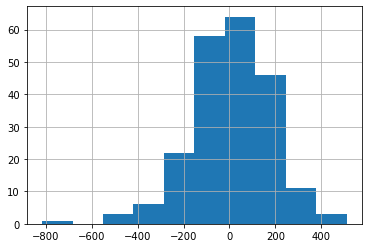

In [3]:
stock.iloc[:,-1].hist()

In [4]:
scaler = preprocessing.StandardScaler()
scaled_values = scaler.fit_transform(stock.iloc[:,1:-1])
stock.iloc[:,1:-1] = scaled_values

y_scaler = preprocessing.StandardScaler()
scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,-1]).reshape(-1,1))
stock.iloc[:,-1] = scaled_values

C:\Users\soumya\AppData\Local\Temp\ipykernel_6648\1158056819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.iloc[:,1:-1] = scaled_values
C:\Users\soumya\AppData\Local\Temp\ipykernel_6648\1158056819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.iloc[:,-1] = scaled_values


In [5]:
window_size = 100
X = []
Y = []
date = []

for i in range(0 , len(stock) - window_size-1 , 1):
    X.append(np.array(stock.iloc[i:i+window_size,1:-1]).reshape(-1,1))
    Y.append(np.array(stock.iloc[i+window_size,-2]).reshape(1,1))
    date.append(stock.iloc[i+window_size,0])

train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.3,shuffle=False)
len_t = len(train_X)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)

train_X = train_X.reshape(train_X.shape[0],1,100,12,1)
test_X = test_X.reshape(test_X.shape[0],1,100,12,1)

_,z = train_test_split(date, test_size=0.3,shuffle=False)
testdate = np.array(z)

In [6]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=(1,100, 12, 1), padding='same')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Conv2D(128, kernel_size=(2,2), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Conv2D(64, kernel_size=(2,2), activation='relu', padding='same')))
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# model.build((None,1, 100, 4, 1))
# print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.fit(train_X, train_label, epochs=40, verbose=1)

Epoch 1/40
3/3 [==============================] - 13s 81ms/step - loss: 0.9728 - mse: 0.9728 - mae: 0.7800
Epoch 2/40
3/3 [==============================] - 0s 94ms/step - loss: 0.9976 - mse: 0.9976 - mae: 0.7859
Epoch 3/40
3/3 [==============================] - 0s 88ms/step - loss: 0.8913 - mse: 0.8913 - mae: 0.7598
Epoch 4/40
3/3 [==============================] - 0s 102ms/step - loss: 0.8687 - mse: 0.8687 - mae: 0.7602
Epoch 5/40
3/3 [==============================] - 0s 95ms/step - loss: 0.7236 - mse: 0.7236 - mae: 0.6905
Epoch 6/40
3/3 [==============================] - 0s 94ms/step - loss: 0.6467 - mse: 0.6467 - mae: 0.6510
Epoch 7/40
3/3 [==============================] - 0s 100ms/step - loss: 0.6374 - mse: 0.6374 - mae: 0.6552
Epoch 8/40
3/3 [==============================] - 0s 100ms/step - loss: 0.5448 - mse: 0.5448 - mae: 0.6053
Epoch 9/40
3/3 [==============================] - 0s 103ms/step - loss: 0.5153 - mse: 0.5153 - mae: 0.5756
Epoch 10/40
3/3 [========================

2/2 [==============================] - 3s 6ms/step


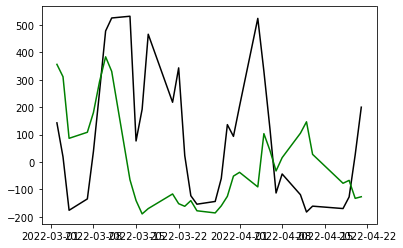

In [7]:
predicted  = model.predict(test_X)
test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
predicted = y_scaler.inverse_transform(predicted)

plt.plot(testdate, test_label[:,0], color = 'black', label = ' Stock Price')
plt.plot(testdate, predicted, color = 'green', label = 'Predicted  Stock Price')
plt.show()

##### CNN-LSTM has been used to predict stock price from previous day stock price and normalizing the data based on window intial value

In [8]:
df = pd.read_csv('data.csv', header=0, parse_dates=[0])
data = df.dropna()
data.head(5)

,Date,Open,High,Low,Close,Shares Traded
0,2021-04-27,14493.80,14667.55,14484.85,14653.05,442211685
1,2021-04-28,14710.50,14890.25,14694.95,14864.55,453990807
2,2021-04-29,14979.00,15044.35,14814.45,14894.90,511466673
3,2021-04-30,14747.35,14855.45,14601.70,14631.10,594744498
4,2021-05-03,14481.05,14673.85,14416.25,14634.15,443410846


In [9]:
X = []
Y = []
df = data
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 4] - first) / first)
    temp2.append((df.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

102
44


In [10]:
model = tf.keras.Sequential()

model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, epochs=40,batch_size=40, verbose=1)

Epoch 1/40
3/3 [==============================] - 14s 23ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.1040
Epoch 2/40
3/3 [==============================] - 0s 34ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0790
Epoch 3/40
3/3 [==============================] - 0s 34ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0513
Epoch 4/40
3/3 [==============================] - 0s 29ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0602
Epoch 5/40
3/3 [==============================] - 0s 32ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0525
Epoch 6/40
3/3 [==============================] - 0s 31ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0509
Epoch 7/40
3/3 [==============================] - 0s 37ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0477
Epoch 8/40
3/3 [==============================] - 0s 35ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0449
Epoch 9/40
3/3 [==============================] - 0s 42ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0448
Epoch 10/40
3/3 [============================

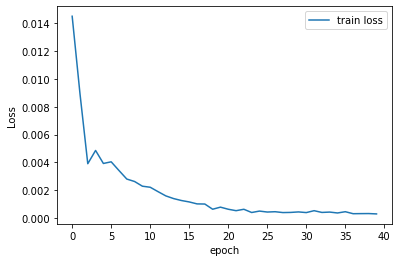

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

2/2 [==============================] - 3s 6ms/step


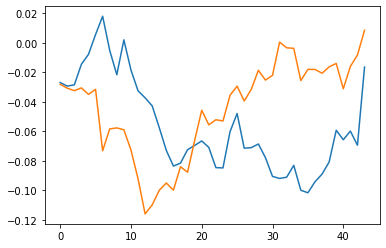

In [12]:
predicted  = model.predict(test_X)
plt.plot(predicted)
plt.plot(test_Y.reshape(-1))

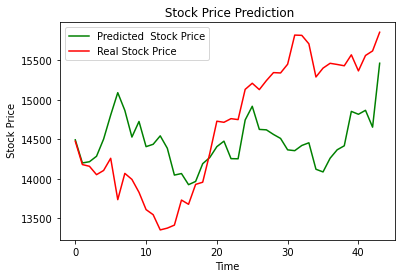

In [13]:
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j - window_size,4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()